In [1]:
import os
import re

import requests
from bs4 import BeautifulSoup as bs

In [3]:
r = requests.get('https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor-list')

#convert to beautifulsoup
soup = bs(r.content)

#print out
contents = soup.prettify()

In [4]:
# testing on ultimate sponsor
table = soup.find('table', class_= 'table sponsor-list-table')
tr = table.findAll('tr', class_='sponsor-list-exhibitor-row')

In [5]:
tr[0]['data-booth-sign-clean']

'Allergan Aesthetics '

In [7]:
# Find all the table rows with class "sponsor-list-exhibitor-row"
tr = table.findAll('tr', class_='sponsor-list-exhibitor-row')

# Create an empty list to store the data
dicts = []

# Loop through each row to get the data
for row in tr:
    # Get the value of the 'data-booth-sign-clean' attribute for the current row
    name_clean = row['data-booth-sign-clean']

    # Append the value to the data_list
    if name_clean:
        dicts.append(name_clean)


In [8]:
for row in tr:
    name_clean = row['data-booth-sign-clean']
    dicts.append(name_clean)

dicts

['Allergan Aesthetics ',
 'BioScience GmbH',
 'Galderma',
 'Laboratoires VIVACY',
 'TEOXANE LABORATORIES',
 'Allergan Aesthetics ',
 'BioScience GmbH',
 'Galderma',
 'Laboratoires VIVACY',
 'TEOXANE LABORATORIES']

In [11]:
# Get all sponsors data
spon = soup.find('div', class_='container-sponsors')
bod = spon.findAll('tr', class_='sponsor-list-exhibitor-row')

In [12]:
bod[0]

<tr class="sponsor-list-exhibitor-row" data-booth-sign="Allergan Aesthetics " data-booth-sign-clean="Allergan Aesthetics " data-company-name="ALLERGAN PHARMACEUTICALS INT LTD" data-hidden="false" data-industry-category1="2" data-industry-category2="26" data-industry-category3="" data-inprogress="no" id="sponsors-list-sponsor-13309-sponsorship-level">
<td>
                                                            ALLERGAN AESTHETICS 
                                                                                                                    </td>
<td class="text-center">
<a class="fancybox-iframe" href="https://www.imcas.com/en/exhibit/imcas-world-congress-2023/sponsor/map/ajax?id=13309">N227</a>
</td>
<td>Ireland</td>
<td>
<a class="fancybox-ajax" href="https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13309">Profile</a>
</td>
<td>
<span class="sponsorship-ultimate">
                                                                ULTIMATE
                      

In [13]:
bod[1].find('span', class_="sponsorship-ultimate").getText(" ", strip= True).replace("\n"," ")

'ULTIMATE'

In [14]:
lol = soup.find('div', class_='container-sponsors')
loll = lol.find('tbody')

print(loll)

<tbody>
<tr class="sponsor-list-exhibitor-row" data-booth-sign="Allergan Aesthetics " data-booth-sign-clean="Allergan Aesthetics " data-company-name="ALLERGAN PHARMACEUTICALS INT LTD" data-hidden="false" data-industry-category1="2" data-industry-category2="26" data-industry-category3="" data-inprogress="no" id="sponsors-list-sponsor-13309-sponsorship-level">
<td>
                                                            ALLERGAN AESTHETICS 
                                                                                                                    </td>
<td class="text-center">
<a class="fancybox-iframe" href="https://www.imcas.com/en/exhibit/imcas-world-congress-2023/sponsor/map/ajax?id=13309">N227</a>
</td>
<td>Ireland</td>
<td>
<a class="fancybox-ajax" href="https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13309">Profile</a>
</td>
<td>
<span class="sponsorship-ultimate">
                                                                ULTIMATE
              

In [135]:
# get sponsorship level

spon_level = []

for ss in bod:
    level = ss.find('span', class_="container-sponsors")
    if level is not None:
        level_list = level.getText(" ", strip=True).replace("\n", " ")
    else:
        continue

    spon_level.append(level_list)

spon_level


[]

In [16]:
# Get company names

name_list = []
for com in bod:
    data_clean = com['data-booth-sign-clean']
    name_list.append(data_clean)


name_list


['Allergan Aesthetics ',
 'BioScience GmbH',
 'Galderma',
 'Laboratoires VIVACY',
 'TEOXANE LABORATORIES',
 'Croma Pharma GmbH',
 'FILLMED Laboratoires',
 'IBSA Farmaceutici Italia',
 'Merz Aesthetics',
 'SINCLAIR',
 'FIDIA PHARMA',
 'NEAUVIA',
 'Prollenium',
 'ALTA CARE LABORATOIRES',
 'APYX MEDICAL',
 'BTL Aesthetics',
 'Cynosure',
 'DERMAQUAL',
 'DEXLEVO',
 'Fotona',
 'Hydrafacial ',
 'InMode Aesthetic Solutions',
 'LG Chem',
 'Lumenis',
 'RELIFE',
 'SENSILIS | Sensitive Skin Lab',
 'Sesderma',
 'SkinCeuticals',
 'AestheFill® CollagenStimulator',
 'Alma',
 'Bioxis Pharmaceuticals',
 'BR PHARM',
 'CAREGEN',
 'CHA Meditech Co., Ltd.',
 'CLASSYS',
 'Crown Aesthetics / SkinPen',
 'Cutera',
 'DermapenWorld',
 'INDIBA',
 'Laboratoire Revitacare',
 'mesoestetic Pharma Group',
 'miraDry, Inc.',
 'NAOS / Institut Esthederm',
 'Samyang Holdings Corporation ',
 'Skymedic',
 'TOSKANIMED',
 'Across Co.,Ltd.',
 'Adoderm',
 'Aerolase',
 'Aptos',
 'Bloomea Paris',
 'Candela Medical',
 'CMed Aesthet

In [18]:
# Extract Origin country of each company
countries = []

# Loop
for ct in bod:
    # get td index[2]
    td_elements = ct.findAll('td')
    country = td_elements[2].text.strip()
    countries.append(country)

countries

['Ireland',
 'Germany',
 'France',
 'France',
 'Switzerland',
 'Austria',
 'France',
 'Italy',
 'Germany',
 'France',
 'Italy',
 'Switzerland',
 'Canada',
 'Italy',
 'United States',
 'United States',
 'United States',
 'France',
 'South Korea',
 'Slovenia',
 'United States',
 'United States',
 'South Korea',
 'Germany',
 'Italy',
 'Spain',
 'Spain',
 'France',
 'South Korea',
 'Germany',
 'France',
 'South Korea',
 'South Korea',
 'South Korea',
 'South Korea',
 'United States',
 'United States',
 'Australia',
 'Spain',
 'France',
 'Spain',
 'United States',
 'France',
 'South Korea',
 'Spain',
 'Spain',
 'South Korea',
 'Germany',
 'United States',
 'Georgia',
 'France',
 'United States',
 'Italy',
 'Italy',
 'South Korea',
 'South Korea',
 'Spain',
 'Italy',
 'France',
 'South Korea',
 'South Korea',
 'Italy',
 'France',
 'France',
 'Italy',
 'France',
 'Switzerland',
 'Italy',
 'United States',
 'United States',
 'Italy',
 'Italy',
 'South Korea',
 'United Kingdom',
 'United States

In [20]:
#get the link of each company
links = spon.find_all('a', class_= 'fancybox-ajax')

In [21]:
website = []

for ll in links:
    web = ll['href']
    print(web)
    website.append(web)

https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13309
https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13341
https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13437
https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13393
https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13605
https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13377
https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13432
https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13459
https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13522
https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13585
https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13431
https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13532
https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13590
https://www.imcas.com/en/attend/imcas-world-congress-2023/sponso

In [22]:
website

['https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13309',
 'https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13341',
 'https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13437',
 'https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13393',
 'https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13605',
 'https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13377',
 'https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13432',
 'https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13459',
 'https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13522',
 'https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13585',
 'https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13431',
 'https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13532',
 'https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13590',
 'https://ww

## Product detail

In [35]:
p = requests.get('https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13437')
soupp = bs(p.content)

#print out

comweb = soupp.prettify()
print(comweb)

<html>
 <head>
  <link href="https://fonts.googleapis.com/css?family=Open+Sans:300,400,700|Lato:400,700|Source+Sans+Pro:400,700|Roboto:100,400,700,300,300italic,400italic,500,500italic,700italic,900,900italic|Raleway:400,700,200,200italic,300,300italic,400italic,500,500italic,600,600italic,700italic,800,800italic,900,900italic&amp;subset=latin,cyrillic-ext,cyrillic,latin-ext" rel="stylesheet" type="text/css"/>
  <link href="https://fonts.googleapis.com/css?family=Playfair+Display" rel="stylesheet" type="text/css"/>
  <link href="https://fonts.googleapis.com/css?family=Merriweather:300,400" rel="stylesheet"/>
  <style>
   body{
        margin : 0;
    }

    .backImcas{
        display:block;
        margin : 0;
        padding : 15px 20px;
        background: #B24268;
        color: white;
        font-weight:bold;
        font-size: 16px;
        font-family: "roboto";
        box-sizing: border-box;
        text-decoration: none;
    }

    .physicBooth{
        margin: 0px auto;
   

## Get website

In [306]:
web_link = soupp.select_one('p.sponsor-profile-modal-content-sponsor-details a')
web_link

<a href="http://www.galderma.com" target="_blank">www.galderma.com</a>

In [301]:
def get_web(zoup):
    web_link = zoup.select_one('p.sponsor-profile-modal-content-sponsor-details a')
    if web_link:
        website_url = web_link['href']
        print(website_url)
    else:
        print("Website URL not found.")

In [307]:
get_web(soupp)

http://www.galderma.com


## Get Product Type

In [225]:
soupp.select_one('div[style="font-size: 14px;font-weight:200;font-style: italic;"]').getText(" ", strip=True)

'- Injectables: Fillers - Injectables: Botulinum toxins'

In [231]:
def get_data(zoup):
    pro = 'div[style="font-size: 14px;font-weight:200;font-style: italic;"]'
    prot = zoup.select_one(pro)

    if prot:
        items = [item.getText(" ", strip=True).replace(" ", "") for item in prot.find_all(text=True)]
        non_empty_items = [item for item in items if item]  # Filter out empty strings
        return non_empty_items
    else:
        return 'NA'


In [232]:
get_data(soupp)

['-Injectables:Fillers', '-Injectables:Botulinumtoxins']

## Get Company profile

In [ ]:
res = soupp.find('div', class_= 'sponsor-resume').getText(" ", strip= True)
res

In [131]:
def get_web(zoup):
    if zoup.find('a'):
        return zoup.find('a')['href']

## Get Origin

In [296]:
def get_origin(zoup):
    countries = zoup.find_all('h5', class_='sponsor-profile-modal-content-sponsor-country')
    if countries:
        return [oo.getText(" ", strip=True).replace("\n", " ") for oo in countries if oo.getText(" ", strip=True).replace("\n", " ").strip()]
    else:
        return None

In [297]:
get_origin(soupp)

['Germany']

In [57]:
def get_origin(zoup):
    countries = zoup.find('h5', class_='sponsor-profile-modal-content-sponsor-country')
    if countries:
        country_dict = countries.getText(" ", strip=True).replace("\n", " ").strip()
        return (country_dict)
    else:
        return None

In [58]:
get_origin(soupp)

'France'

# Write Funtion

In [59]:
def scrape_website(url):
    def get_com(zoup):
        if zoup.find('h4', class_="sponsor-profile-modal-content-sponsor-title"):
            return [cc.getText() for cc in zoup.find_all('h4', class_='sponsor-profile-modal-content-sponsor-title')]

    def get_origin(zoup):
        countries = zoup.find('h5', class_='sponsor-profile-modal-content-sponsor-country')
        if countries:
            country_dict = countries.getText(" ", strip=True).replace("\n", " ").strip()
            return (country_dict)
        else:
            return None

    def get_web(zoup):
        web_link = zoup.select_one('p.sponsor-profile-modal-content-sponsor-details a')
        if web_link:
            website_url = web_link['href']
            return(website_url)
        else:
            return("Website URL not found.")

    def get_data(zoup):
        pro = 'div[style="font-size: 14px;font-weight:200;font-style: italic;"]'
        prot = zoup.select_one(pro)

        if prot:
            items = [item.getText(" ", strip=True).replace(" ", "") for item in prot.find_all(text=True)]
            non_empty_items = [item for item in items if item]  # Filter out empty strings
            return non_empty_items
        else:
            return 'NA'

    def get_res(zoup):
        if zoup.find('div', class_="sponsor-resume"):
            return [rr.getText(" ", strip=True).replace("\n", " ").replace('\r', '') for rr in zoup.find_all('div', class_='sponsor-resume')]
        else:
            return 'NA'

    u = requests.get(url)
    zoup = bs(u.content)
    com_list = {}


    company_name = get_com(zoup)[0]
    country = get_origin(zoup)
    com_web = get_web(zoup)
    product_info = get_data(zoup)
    company_resume = get_res(zoup)[0]


    com_list['Company Name'] = company_name
    com_list['Country'] = country
    com_list['Official Website'] = com_web
    com_list['Product Type'] = product_info
    com_list['Company Profile'] = company_resume

    return com_list


In [60]:
scrape_website('https://www.imcas.com/en/attend/imcas-world-congress-2023/sponsor/13437')

{'Company Name': 'Galderma',
 'Country': 'France',
 'Official Website': 'http://www.galderma.com',
 'Product Type': ['-Injectables:Fillers',
  '-Pharmaceutical-Drugsindermatologyorplasticsurgery',
  '-Injectables:Botulinumtoxins'],
 'Company Profile': 'With a unique heritage in dermatology as well as decades of cutting-edge innovation, Galderma is the leading company solely dedicated to advancing dermatology for every skin story. We are strategically positioned in attractive, consumer-driven segments of the dermatology market, characterized by high growth fundamentals. Through trusted partnerships with healthcare professionals, we ensure to meet individual consumer and patient needs with superior outcomes. For more information: www.galderma.com'}

In [64]:
info_list = []

In [65]:
# test function

for web in website[0:4]:
    exh = scrape_website(web)
    info_list.append(exh)


In [66]:
info_list

[{'Company Name': 'Allergan Aesthetics ',
  'Country': 'Ireland',
  'Official Website': 'https://www.allerganaesthetics.com/',
  'Product Type': ['-Injectables:Fillers', '-Injectables:Botulinumtoxins'],
  'Company Profile': 'The science of you Allergan Aesthetics, an AbbVie company, drives the advancement of aesthetic medicine. Centered in science, we develop, manufacture, and market a portfolio of innovative treatments and technologies spanning facial injectables, body-contouring, surgical, and skincare products that define our industry and serve our customers.  Here. Confidently. Together.  As a leader in aesthetics, we continue to steer innovation by investing in customer success. Our hands-on education and training programs are taught at the highest level of clinical excellence and represent the latest thinking and innovations in the industry, backed by science. Our people are our greatest strength. Change never stops, and the variety of perspectives, ideas, and backgrounds embodie

In [67]:
# Gather each company detail into lists
company_list = []

for web in website:
    company_list.append(scrape_website(web))

# Import Jason

In [68]:
import json

def save_data(title, data):
    with open(title,'w', encoding='utf-8') as f:
        json.dump(data,f, ensure_ascii=False, indent=2)

In [69]:
def load_data(title):
    with open(title, encoding='utf-8') as f:
        return json.load(f)

In [71]:
save_data('company_list_clean.json', company_list)

In [72]:
company_list[20]

{'Company Name': 'Hydrafacial ',
 'Country': 'United States',
 'Official Website': 'http://www.hydrafacial.com',
 'Product Type': ['-Surgicalinstruments-Medicalinstruments-Equipments-Furniture-Disposablesupplies',
  '-Cosmeceutics-Antiagingproducts',
  '-Dermatologytreatment-Acne'],
 'Company Profile': 'Hydrafacial is revolutionising skin health for aesthetic professionals and their clients. Innovating for over 22 years, we have 68 patents issued/pending and numerous awards including New Beautyâ€™s Best, 4 years running. We are loved around the world, found in over 11,000 locations throughout 90+ countries. The Hydrafacial is a 3-step, 30-minute treatment that cleanses, extracts, and hydrates while quenching skin with vital nutrients like antioxidants, peptides, and hyaluronic acid. The amazing results are both instant and long-lasting, improving the appearance of fine lines, enlarged pores, congested skin, and dark spots. Furthermore, our portfolio of boosters,  caters for a variety o

# Convert to CSV

In [73]:
import pandas as pd

In [74]:
dfcom = pd.DataFrame(company_list)
dfcom.head()

,Company Name,Country,Official Website,Product Type,Company Profile
0,Allergan Aesthetics,Ireland,https://www.allerganaesthetics.com/,"[-Injectables:Fillers, -Injectables:Botulinumt...","The science of you Allergan Aesthetics, an Abb..."
1,BioScience GmbH,Germany,http://www.BioScienceGmbH.com,NA,German experts in aesthetic medicine since 200...
2,Galderma,France,http://www.galderma.com,"[-Injectables:Fillers, -Pharmaceutical-Drugsin...",With a unique heritage in dermatology as well ...
3,Laboratoires VIVACY,France,https://www.vivacy.com,"[-Injectables:Fillers, -Cosmeceutics-Antiaging...",Laboratoires VIVACY is a French manufacturer s...
4,TEOXANE LABORATORIES,Switzerland,http://www.teoxane.com,"[-Injectables:Fillers, -Cosmeceutics-Antiaging...",TEOXANE Laboratories were created in 2003 ...


In [76]:
dfcom.to_csv('company_list_clean.csv')

In [78]:
dfcom.head(50)

,Company Name,Country,Official Website,Product Type,Company Profile
0,Allergan Aesthetics,Ireland,https://www.allerganaesthetics.com/,"[-Injectables:Fillers, -Injectables:Botulinumt...","The science of you Allergan Aesthetics, an Abb..."
1,BioScience GmbH,Germany,http://www.BioScienceGmbH.com,NA,German experts in aesthetic medicine since 200...
2,Galderma,France,http://www.galderma.com,"[-Injectables:Fillers, -Pharmaceutical-Drugsin...",With a unique heritage in dermatology as well ...
3,Laboratoires VIVACY,France,https://www.vivacy.com,"[-Injectables:Fillers, -Cosmeceutics-Antiaging...",Laboratoires VIVACY is a French manufacturer s...
4,TEOXANE LABORATORIES,Switzerland,http://www.teoxane.com,"[-Injectables:Fillers, -Cosmeceutics-Antiaging...",TEOXANE Laboratories were created in 2003 ...
5,Croma Pharma GmbH,Austria,http://www.croma.at,"[-Injectables:Fillers, -Threads-Suspendingdevi...","Founded in 1976, Croma-Pharma GmbH (Croma) is ..."
6,FILLMED Laboratoires,France,https://fillmed.com,"[-Injectables:Fillers, -Cosmeceutics-Antiaging...",FILLMED Laboratories have been pioneering in a...
7,IBSA Farmaceutici Italia,Italy,http://www.ibsaderma.com,"[-Injectables:Fillers, -Cosmeceutics-Antiaging...",Founded by a group of Swiss biologists in 1945...
8,Merz Aesthetics,Germany,https://www.merzaesthetics.com/,"[-Injectables:Fillers, -Injectables:Botulinumt...",Merz Aesthetics is a medical aesthetics busine...
9,SINCLAIR,France,https://sinclair.com,"[-Threads-Suspendingdevices, -Injectables:Fill...",Sinclair is an international company operating...


## Analysis
- Geographic distribution ( Countries and Continents)
- Industry Segmentation
- Sponsorship Growth Over Time

In [136]:
import pandas as pd

# Load the data
data = pd.read_csv('company_list_clean.csv')
data.head()

,Unnamed: 0,Company Name,Country,Official Website,Product Type,Company Profile
0,0,Allergan Aesthetics,Ireland,https://www.allerganaesthetics.com/,"['-Injectables:Fillers', '-Injectables:Botulin...","The science of you Allergan Aesthetics, an Abb..."
1,1,BioScience GmbH,Germany,http://www.BioScienceGmbH.com,NaN,German experts in aesthetic medicine since 200...
2,2,Galderma,France,http://www.galderma.com,"['-Injectables:Fillers', '-Pharmaceutical-Drug...",With a unique heritage in dermatology as well ...
3,3,Laboratoires VIVACY,France,https://www.vivacy.com,"['-Injectables:Fillers', '-Cosmeceutics-Antiag...",Laboratoires VIVACY is a French manufacturer s...
4,4,TEOXANE LABORATORIES,Switzerland,http://www.teoxane.com,"['-Injectables:Fillers', '-Cosmeceutics-Antiag...",TEOXANE Laboratories were created in 2003 ...


# Geographic Distribution by Country

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style('whitegrid')

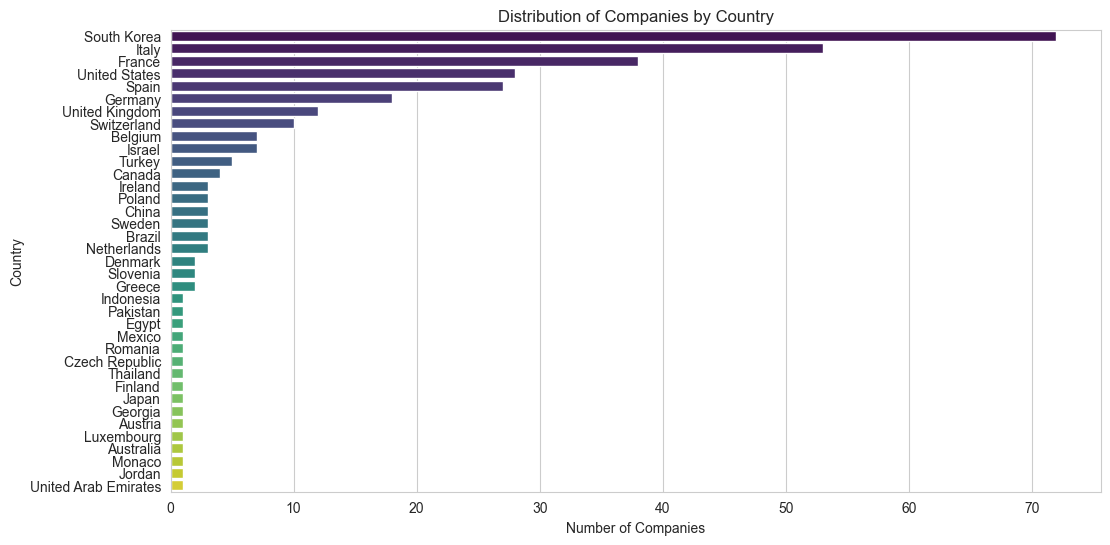

In [138]:

# Plot the distribution of companies by country
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Country', order=data['Country'].value_counts().index, palette='viridis')
plt.title('Distribution of Companies by Country')
plt.xlabel('Number of Companies')
plt.ylabel('Country')
plt.show()

### Distribution of Companies by Country
From the visualization, we observe the following distribution of sponsorship companies by country:

South Korea has the highest number of sponsorship companies.
Italy ranks second in the number of sponsorship companies.
France comes in third place.
This distribution provides insights into the countries with the most representation in the IMCAS World Congress 2023 sponsorships.

In [ ]:
# Categorize countries into continents
def country_to_continent(country):
    mapping = {
        'South Korea': 'Asia',
        'Italy': 'Europe',
        'France': 'Europe',
        'Switzerland': 'Europe',
        'Germany': 'Europe',
        'Ireland': 'Europe',
        'USA': 'North America',
        'Canada': 'North America',
        'Australia': 'Australia',
        'Brazil': 'South America',
        'Argentina': 'South America',
        'China': 'Asia',
        'Japan': 'Asia',
        'India': 'Asia',
        'Austria': 'Europe',
        'Slovenia': 'Europe',
        'Spain': 'Europe',
        'Georgia': 'Europe',
        'United Kingdom': 'Europe',
        'Turkey': 'Europe',
        'Netherlands': 'Europe',
        'Belgium': 'Europe',
        'Israel': 'Asia',
        'United States': 'North America',
        'Jordan': 'Asia',
        'Monaco': 'Europe',
        'Sweden': 'Europe',
        'Denmark': 'Europe',
        'Luxembourg': 'Europe',
        'Poland': 'Europe',
        'Greece': 'Europe',
        'Finland': 'Europe',
        'Indonesia': 'Asia',
        'Thailand': 'Asia',
        'Czech Republic': 'Europe',
        'Romania': 'Europe',
        'Mexico': 'North America',
        'Egypt': 'Africa',
        'Pakistan': 'Asia',
        'United Arab Emirates': 'Asia'
    }
    return mapping.get(country, 'Other')

data['Continent'] = data['Country'].apply(country_to_continent)

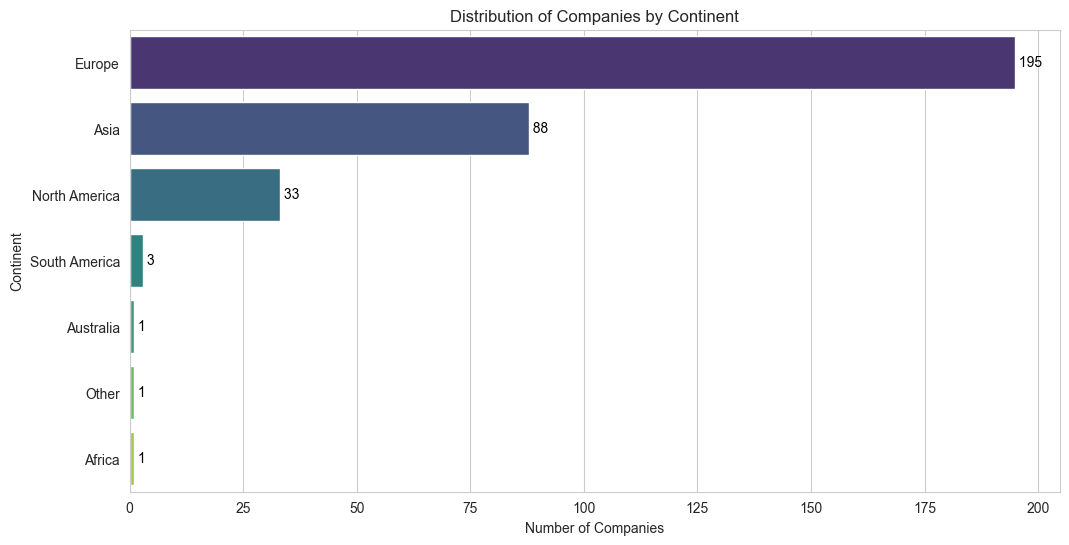

In [153]:
# Plot the distribution of companies by continent using a horizontal bar chart with labeled values
continent_counts_final = data['Continent'].value_counts()
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=continent_counts_final.values, y=continent_counts_final.index, palette='viridis')

# Label the values on the bars
for index, value in enumerate(continent_counts_final.values):
    ax.text(value, index, f' {value}', color='black', va='center')

plt.title('Distribution of Companies by Continent')
plt.xlabel('Number of Companies')
plt.ylabel('Continent')
plt.show()

In [147]:
# Define columns that will be set based on 'Product Type'
cols_to_set = ['Injectables', 'Pharmaceutical', 'Cosmeceutics', 'Energybased devices', 'Suspending devices', 'Other']

# Initialize the columns with zeros
for col in cols_to_set:
    data[col] = 0

# Categorize the product types based on the provided logic
for index, row in data.iterrows():
    product_type = row['Product Type']
    if isinstance(product_type, str):
        product_types = product_type.split('-')
        for product in product_types:
            if 'Injectables' in product:
                data.at[index, 'Injectables'] = 1
            elif 'Pharmaceutical' in product:
                data.at[index, 'Pharmaceutical'] = 1
            elif 'Cosmeceutics' in product:
                data.at[index, 'Cosmeceutics'] = 1
            elif 'Energybaseddevices' in product:
                data.at[index, 'Energybased devices'] = 1
            elif 'Thread' in product:
                data.at[index, 'Suspending devices'] = 1
            else:
                data.at[index, 'Other'] = 1

# Calculate the counts for each category
category_counts = data[cols_to_set].sum()
category_counts

Injectables             88
Pharmaceutical           6
Cosmeceutics           108
Energybased devices     67
Suspending devices      37
Other                  225
dtype: int64

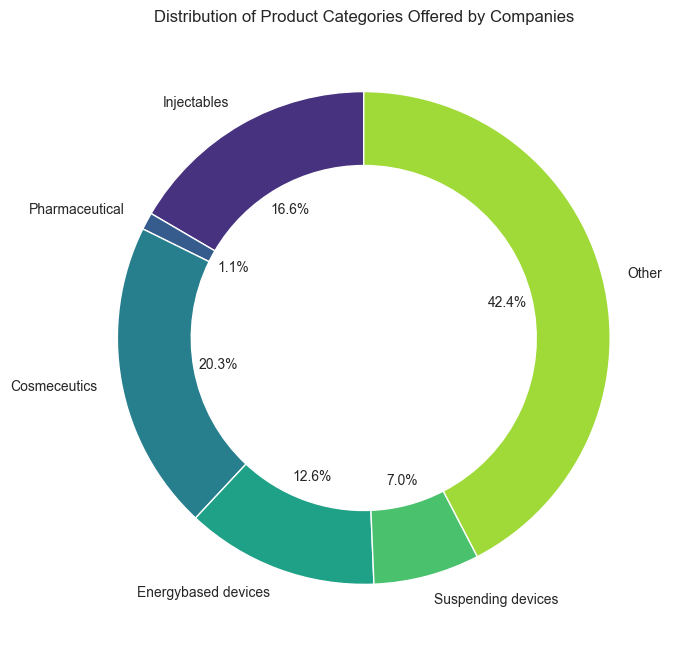

In [148]:
# Plot the distribution of product categories using a donut chart
fig, ax = plt.subplots(figsize=(12, 8))
colors = sns.color_palette('viridis', len(category_counts))
ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))
plt.title('Distribution of Product Categories Offered by Companies')
plt.show()

# Sponsorship Growth Over Time (2016 - 2023 )

In [154]:
# Create a DataFrame from the collected data
sponsorship_data = {
    'Year': [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Number_of_Sponsors': [174, 173, 186, 272, 322, 336, 336, 322]
}
df_sponsorship = pd.DataFrame(sponsorship_data)

# Display the DataFrame
df_sponsorship

,Year,Number_of_Sponsors
0,2016,174
1,2017,173
2,2018,186
3,2019,272
4,2020,322
5,2021,336
6,2022,336
7,2023,322


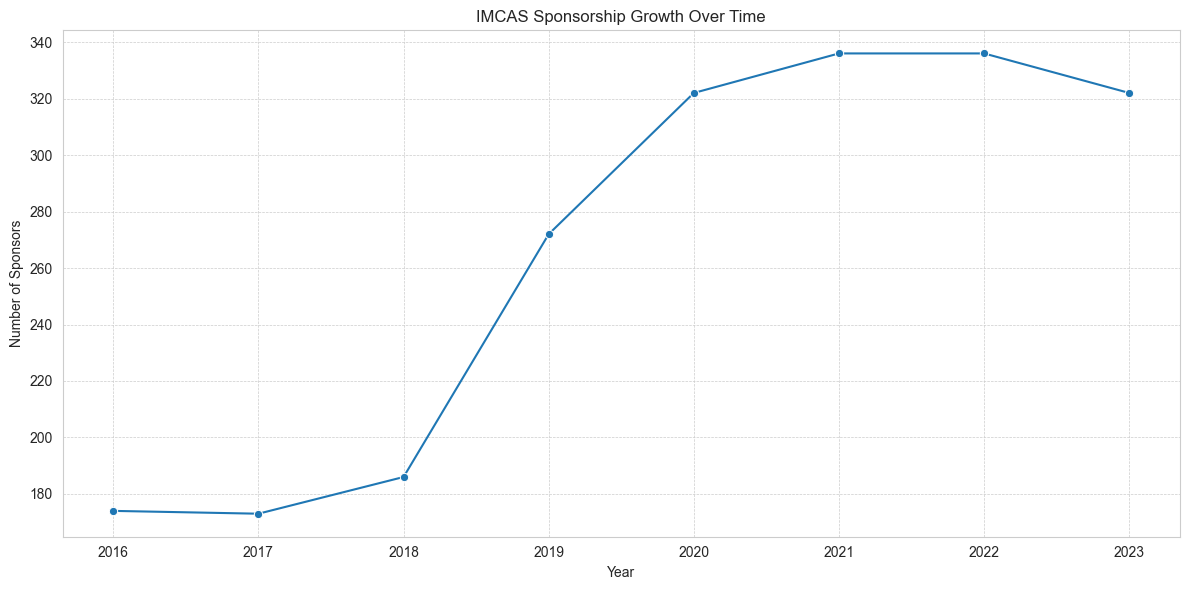

In [156]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Number_of_Sponsors', data=df_sponsorship, marker='o')

plt.title('IMCAS Sponsorship Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Sponsors')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# IMCAS Sponsorship Growth Over Time: Observations
- The number of sponsors showed a **steady increase** from 2016 to 2018.
- There was a **significant jump** in the number of sponsors from 2018 to 2019. This increase might be indicative of a pivotal event or change either in the industry or within IMCAS that attracted a larger number of sponsors.
- The **peak** in sponsorship was observed in the years 2021 and 2022, with both years having the same number of sponsors.
- A **slight decrease** in the number of sponsors was noted in 2023 compared to the previous two years.


The overall trend suggests a growing interest and involvement in IMCAS over the years, with a particularly notable growth spurt starting in 2019.

# Overall Summary of IMCAS Sponsorship Analysis

## 1. Geographic Distribution
- Diverse Representation: Companies from over 50 countries sponsor IMCAS, showcasing its global appeal.
- European Dominance: Europe, led by countries like France, Italy, and Germany, emerges as a major hub for the aesthetic industry.
- Asian Growth: Significant representation from Asian countries, especially South Korea and China, indicates the region's growing importance in the aesthetic market.
## 2. Industry Segmentation
- Varied Sectors: Sponsors span diverse sectors, including injectables, pharmaceuticals, cosmeceuticals, medical devices and more.
- Leading Segments: Injectables and cosmeceuticals dominate, hinting at a preference for non-invasive treatments and skincare.
- Emerging Technologies: The presence of energy-based devices suggests a tilt towards technological advancements in non-surgical procedures.
## 3. Sponsorship Growth Over Time
- Steady Initial Growth: From 2016 to 2018, there's a consistent growth in sponsors, marking a rise in IMCAS's industry stature.
- Significant Surge: 2019 sees a sharp spike in sponsorship, possibly indicating industry innovations or broader aesthetic treatment acceptance.
- Peak and Stabilization: 2021 and 2022 mark peak sponsorship, with a slight dip in 2023, hinting at market stabilization or saturation.
## 4. Implications for the Aesthetic Industry
- Rising Consumer Demand: The growth in sponsors and their global spread signifies a surging consumer demand for aesthetic treatments.
- Industry Innovations: The diverse industry segments of sponsors indicate continuous sector innovations, from skincare to advanced treatments.
- Global Trends: The sponsors' geographic spread mirrors global aesthetic treatment trends, with Europe and Asia as significant contributors.